Loading CSV...
Counting usage and wins...


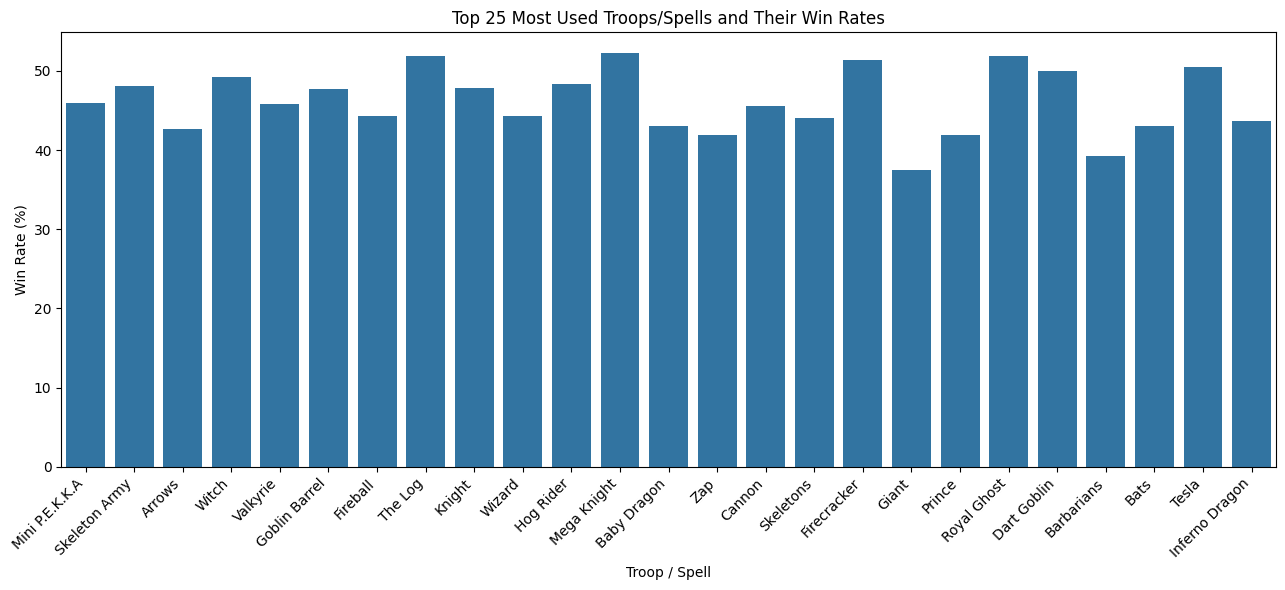

✅ Done. Top troops by usage:
      spell_normal  total_used  win_count   win_rate
1   Mini P.E.K.K.A      285722     131191  45.915610
11   Skeleton Army      249626     120032  48.084735
22          Arrows      234000      99815  42.655983
15           Witch      224217     110403  49.239353
9         Valkyrie      206106      94409  45.806042
35   Goblin Barrel      186963      89292  47.759182
12        Fireball      185852      82305  44.285238
71         The Log      182014      94335  51.828431
2           Knight      166185      79537  47.860517
14          Wizard      160848      71205  44.268502
23       Hog Rider      159961      77325  48.339908
67     Mega Knight      144716      75620  52.254070
38     Baby Dragon      136718      58886  43.071139
27             Zap      133645      56074  41.957425
6           Cannon       99232      45266  45.616333
25       Skeletons       98437      43336  44.024097
70     Firecracker       94242      48463  51.423994
0            Gian

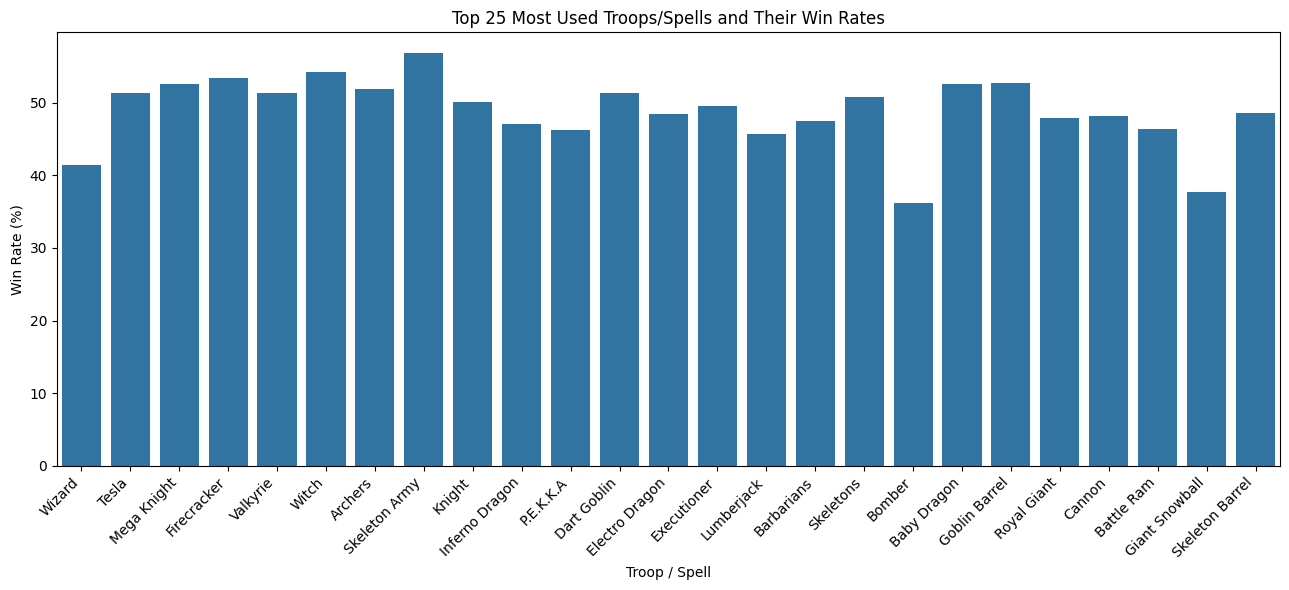

✅ Done. Top troops by usage:
          spell_evo  total_used  win_count   win_rate
10    Skeleton Army       21518      12229  56.831490
6             Witch       34510      18691  54.161113
27      Firecracker       35859      19133  53.356201
21    Goblin Barrel        7736       4080  52.740434
14      Mega Knight       39510      20786  52.609466
15      Baby Dragon        9065       4759  52.498621
0           Archers       28912      15008  51.909242
9             Tesla       40621      20875  51.389675
25      Dart Goblin       13830       7098  51.323210
5          Valkyrie       34763      17837  51.310301
11        Skeletons       11664       5930  50.840192
7            Knight       20952      10494  50.085911
8       Executioner       12711       6291  49.492565
20  Skeleton Barrel        5466       2657  48.609587
1    Electro Dragon       13193       6396  48.480255
31           Cannon        6374       3071  48.180107
12      Royal Giant        6420       3072  47.850467

In [1]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# --- CONFIG ---
FILE_PATH = "../#2 Data Storage/Processed Data/preprocessed_battle_log_full_batch.csv"
TOP_N = 25
# --------------

print("Loading CSV...")
df = pd.read_csv(FILE_PATH, usecols=[
    'players_0_spells', 'players_0_winner',
    'players_1_spells', 'players_1_winner'
])

# Merge both players’ spells and win info
p0 = df[['players_0_spells', 'players_0_winner']].rename(
    columns={'players_0_spells': 'spells', 'players_0_winner': 'winner'}
)
p1 = df[['players_1_spells', 'players_1_winner']].rename(
    columns={'players_1_spells': 'spells', 'players_1_winner': 'winner'}
)
players = pd.concat([p0, p1], ignore_index=True)
del df, p0, p1

# --- Regex to extract troop/spell names ---
# Example string: "[('Royal Ghost', 11, 1), ('Hog Rider', 11, 0)]"
def parse_spells(s):

    # Primary: safe eval of Python literal
    try:
        pattern = re.compile(r"\('([^']+)'\s*,\s*([0-9]+)(?:\s*,\s*([0-9]+))?")
        matches = pattern.findall(s)
        return [(m[0], int(m[2]) if m[2] else None) for m in matches]

    except Exception as e:
        print(e)
        return []


# --- Count occurrences and wins efficiently ---
print("Counting usage and wins...")
use_counter = Counter()
win_counter = Counter()
use_evo_counter = Counter()
win_evo_counter = Counter()

for spells, win in zip(players['spells'], players['winner']):
    spells_list = parse_spells(spells)
    for spell in spells_list:
        name = spell[0]
        evo = spell[1]
        if evo == 1:
            use_evo_counter[name] += 1
            use_counter[name] += 1
            if win == 1 or win is True:
                win_evo_counter[name] += 1
                win_counter[name] += 1
        else:
            use_counter[name] += 1
            if win == 1 or win is True:
                win_counter[name] += 1

# --- Build DataFrame Normal---
troop_stats_normal = pd.DataFrame({
    'spell_normal': list(use_counter.keys()),
    'total_used': list(use_counter.values()),
    'win_count': [win_counter[s] for s in use_counter]})

troop_stats_normal['win_rate'] = troop_stats_normal['win_count'] / troop_stats_normal['total_used'] * 100
troop_stats_normal = troop_stats_normal.sort_values('total_used', ascending=False)


# --- Plot ---
top = troop_stats_normal.head(TOP_N)
plt.figure(figsize=(13, 6))
sns.barplot(data=top, x='spell_normal', y='win_rate')
plt.title(f"Top {TOP_N} Most Used Troops/Spells and Their Win Rates")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Troop / Spell")
plt.ylabel("Win Rate (%)")
plt.tight_layout()
plt.show()

print("✅ Done. Top troops by usage:")
print(troop_stats_normal.head(TOP_N))

# --- Build DataFrame Evo---
troop_stats_evo = pd.DataFrame({
    'spell_evo': list(use_evo_counter.keys()),
    'total_used': list(use_evo_counter.values()),
    'win_count': [win_evo_counter[s] for s in use_evo_counter]})

troop_stats_evo['win_rate'] = troop_stats_evo['win_count'] / troop_stats_evo['total_used'] * 100
troop_stats_evo = troop_stats_evo.sort_values('total_used', ascending=False)
# --- Plot ---
top = troop_stats_evo.head(TOP_N)
plt.figure(figsize=(13, 6))
sns.barplot(data=top, x='spell_evo', y='win_rate')
plt.title(f"Top {TOP_N} Most Used Troops/Spells and Their Win Rates")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Troop / Spell")
plt.ylabel("Win Rate (%)")
plt.tight_layout()
plt.show()

print("✅ Done. Top troops by usage:")
print(troop_stats_evo.head(TOP_N).sort_values('win_rate', ascending=False))


In [2]:
troop_stats_evo

,spell_evo,total_used,win_count,win_rate
3,Wizard,45474,18819,41.384088
9,Tesla,40621,20875,51.389675
14,Mega Knight,39510,20786,52.609466
27,Firecracker,35859,19133,53.356201
5,Valkyrie,34763,17837,51.310301
6,Witch,34510,18691,54.161113
0,Archers,28912,15008,51.909242
10,Skeleton Army,21518,12229,56.831490
7,Knight,20952,10494,50.085911
4,Inferno Dragon,16964,7972,46.993634
